In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df_Train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/digits_dataset/digit-recognizer/train.csv')
df_Train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df_Train.shape)

(42000, 785)


In [ ]:
X = df_Train.iloc[:, 1:].values
y = df_Train.iloc[:, 0].values

(42000, 784)
(42000,)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


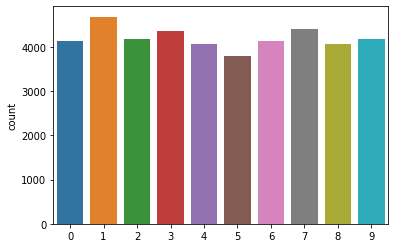

In [ ]:
print(X.shape)
print(y.shape)
sns.countplot(y)

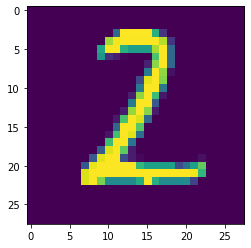

In [ ]:
plt.imshow(X[1400].reshape((28,28)),interpolation='nearest')

In [ ]:

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X = X.reshape(X.shape[0], 28, 28, 1)
X.shape

(42000, 28, 28, 1)

In [ ]:
y = y.reshape(y.shape[0], 1)
print (y.shape)

(42000, 1)


In [ ]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

print (y.shape)

(42000, 10)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2)
print(X_train.shape)
print(X_test.shape)


(37800, 28, 28, 1)
(4200, 28, 28, 1)


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (28,28,1)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (28,28,1)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.compile(optimizer = RMSprop(), loss = "categorical_crossentropy", metrics=["accuracy"])
# model.compile(optimizer = Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])


# 96% accuracy with adam optimiser and 97% with RMSprop (Without CNN)
# 98.83% accuracy with adam optimiser and 99.2% with RMSprop (CNN)

In [ ]:
batch_size=95
epoch=50

tracker=model.fit(X_train,y_train, batch_size=batch_size,
                              epochs = epoch,validation_split=0.1)
model.summary()

Epoch 1/50
359/359 [==============================] - 91s 254ms/step - loss: 0.2391 - accuracy: 0.9243 - val_loss: 0.0762 - val_accuracy: 0.9772
Epoch 2/50
359/359 [==============================] - 90s 252ms/step - loss: 0.0660 - accuracy: 0.9790 - val_loss: 0.0519 - val_accuracy: 0.9844
Epoch 3/50
359/359 [==============================] - 90s 251ms/step - loss: 0.0466 - accuracy: 0.9852 - val_loss: 0.0941 - val_accuracy: 0.9762
Epoch 4/50
359/359 [==============================] - 90s 252ms/step - loss: 0.0377 - accuracy: 0.9889 - val_loss: 0.0712 - val_accuracy: 0.9820
Epoch 5/50
359/359 [==============================] - 91s 252ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0518 - val_accuracy: 0.9886
Epoch 6/50
359/359 [==============================] - 90s 252ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0706 - val_accuracy: 0.9833
Epoch 7/50
359/359 [==============================] - 90s 252ms/step - loss: 0.0242 - accuracy: 0.9927 - val_loss: 0.0627 - val_ac

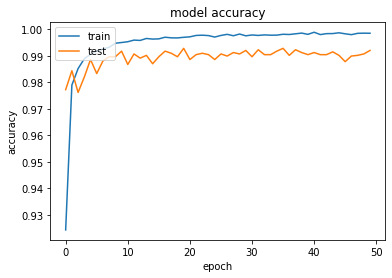

In [ ]:
plt.plot(tracker.history['accuracy'])
plt.plot(tracker.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

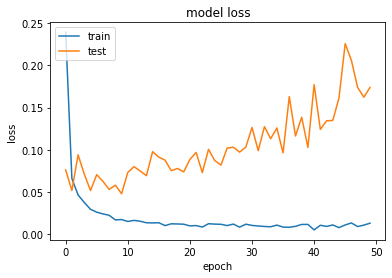

In [ ]:
plt.plot(tracker.history['loss'])
plt.plot(tracker.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

Test Score: 0.12359727919101715
Test Accuracy: 0.9928571581840515


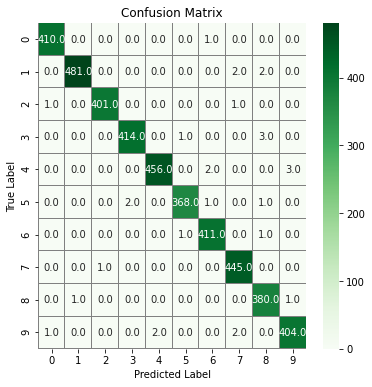

In [ ]:
pred = model.predict(X_test)

pred_classes = np.argmax(pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, pred_classes) 

f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

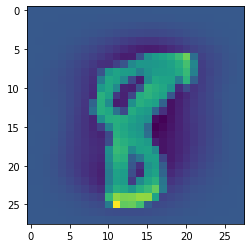

In [ ]:
plt.imshow(X_test[120].reshape(28,28),interpolation='nearest')
plt.show()

In [ ]:
image = X_test[120]
test_img = image.reshape(1,28,28,1)

preds = model.predict(test_img)
print("The predicted number is: ",np.argmax(preds))

The predicted number is:  8
